# Исследование данных о российском кинопрокате



# Исследование российского рынка кинопроката и выявление текущих трендов

**Краткое описание проекта:**

Заказчик проекта - Министерство культуры Российской Федерации.

Данные получены с портала открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

**Цели проекта:**

Изучение рынка российского кинопроката и выявление текущих трендов. Также необходимо проанализировать фильмы, которые получили государственную поддержку. Нужно ответить на вопрос, насколько такие фильмы интересны зрителю. 

**Описание данных:**

Имеется два датасета:

* Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
* Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.

**План работы:**
* Открыть файлы с данными и объединить их в один датафрейм
* Провести исследовательский анализ данных
* Исследовать фильмы, которые получили государственную поддержку
* Составить вывод по проекту
    

# Шаг 1. Открываем файлы с данными и объедините их в один датафрейм. 

Объединяем данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

Импортирование библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Молодец, что загружаешь все библиотеки в начале проекта. Так сложней случайно удалить ячейку с загрузкой нужной библиотеки и сделать код не работающим. А получатель отчета сразу поймет, какие библиотеки ты используешь и какие ему нужно установить для запуска проекта.

</div>

Открываем файлы с данными и смотрим info(), смотрим количество уникальных значений в столбце `puNumber`

In [2]:
df1 = pd.read_csv('/datasets/mkrf_movies.csv')

In [3]:
df1.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
len(df1['puNumber'].unique())

7484

In [6]:
df2 = pd.read_csv('/datasets/mkrf_shows.csv')

In [7]:
df2

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
...,...,...
3153,224014814,1.530000e+03
3154,224021411,9.270000e+03
3155,224022410,4.000000e+02
3156,224023210,3.600000e+02


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Для объединения таблиц меняем в df2 тип столбца puNumber

In [9]:
df2['puNumber'] = df2['puNumber'].astype('str')

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   object 
 1   box_office  3158 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


Объединяем таблицы, смотрим info(), проверяем количество уникальных значений объединенной таблицы.

In [11]:
data = df1.merge(df2, on='puNumber', how='left')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [13]:
len(data['puNumber'].unique())

7484

Количество уникальных значений в `data` и `df1` сошлось, значит объединение прошло верно. 

Приводим имя столбца `puNumber` к snake_case

In [14]:
data = data.rename(columns={'puNumber': 'pu_number'})

In [15]:
quantity_rows_start_data = data.shape[0]
quantity_rows_start_data

7486

# Шаг 2. Предобработка данных

## Шаг 2.1. Проверяем типы данных

- Проверяем типы данных в датафрейме и преобразуем их там, где это необходимо.

In [16]:
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Приводим значения столбца `show_start_date` к типу datetime64.

In [18]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%d %H:%M')

*Приводим значения столбца `ratings` к типу float*. Используем pd.to_numeric для перевода строкового типа к `float`

In [19]:
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce') 

Проверяем

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   object             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

## Шаг 2.2. Изучаем пропуски в датафрейме


Проверим пропуски во всех столбцах:

In [21]:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

Преположим, что если в столбцах `refundable_support` и  `nonrefundable_support` пропуски, это значит что финансовой поддержки от государства не было, а значит пропуски можно заменить на 0.

In [22]:
data['refundable_support'] = data['refundable_support'].fillna(0)
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(0)

Пропуски в столбце `budget` заменить на 0 нельзя. Так как если у фильма нет гос поддержки, значит его бюджет состоит из частных инвестици. А их значения мы не знаем.

Пропуски в столбце `financing_source` можно заменить на `"нет гос поддержки"`, так как по количеству пропущенных значений мы видим, что 4 столбца `refundable_support`, `nonrefundable_support`, `budget` и `financing_source` связаны между собой. А значит, если в столбце `financing_source` пропуски, значит не было господдержки. 

In [23]:
data['financing_source'] = data['financing_source'].fillna("нет гос поддержки")

в столбцах `film_studio`, `production_country`, `director`, `producer`, `age_restriction`, `genres` и `box_office` мы не сможем восстановить, поэтому не трогаем пропуски

## Шаг 2.3. Изучаем дубликаты в датафрейме

Проверка на дублирование строки полностью

In [24]:
(data.duplicated()).sum()

0

Проверяем на дублирование в столбцах `title` и `director` по названию фильмов и режиссеров.

In [25]:
data.duplicated(subset=['title', 'director','producer']).sum()

666

Проверяем сколько это в процентах

In [26]:
(data.duplicated(subset=['title', 'director','producer']).sum()/quantity_rows_start_data *100).round(1)

8.9

Менее 10 процентов, поэтому удаляем такие дубликаты.

In [27]:
data = data.drop_duplicates(['title', 'director', 'producer'], keep='first').reset_index(drop=True) 

In [28]:
data

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,NaN,нет гос поддержки,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0.0,0.0,NaN,нет гос поддержки,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,нет гос поддержки,6.8,"фантастика,боевик,триллер",NaN
3,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,0.0,0.0,NaN,нет гос поддержки,7.7,драма,NaN
4,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,0.0,0.0,NaN,нет гос поддержки,8.3,"мелодрама,комедия",2700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,0.0,0.0,NaN,нет гос поддержки,NaN,NaN,NaN
6816,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет гос поддержки,5.4,"боевик,триллер",NaN
6817,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,0.0,0.0,NaN,нет гос поддержки,NaN,NaN,NaN
6818,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,0.0,0.0,NaN,нет гос поддержки,NaN,NaN,NaN


Проверяем номера прокатного удостоверения: 

In [29]:
data['pu_number'].duplicated().sum()

0

## Шаг 2.4. Изучаем категориальные значения

Во многих категориальных столбцах есть проблема: в одну "ячейку" записано сразу несколько значений, а также есть пробелы в начале и конце строки.

Удаляем все пробелы в столбцах `type`, `director`

In [30]:
data['type'] = data['type'].str.strip()
data['director'] = data['director'].str.strip()

Для удобства чтения и работы с датафреймом произведем упрощение значений в столбце `age_restriction`

In [31]:
def age_change(age):
    if age == "«18+» - запрещено для детей":
        return '18+'
    if age == "«6+» - для детей старше 6 лет":
        return '6+'
    if age == '«12+» - для детей старше 12 лет':
        return '12+'
    if age == '«16+» - для детей старше 16 лет':
        return '16+'
    if age == '«0+» - для любой зрительской аудитории':
        return '0+'

data['age_restriction'] = data['age_restriction'].apply(age_change)

## Шаг 2.5. Проверяем количественные значения

Количество значений в столбцах `budget`, `refundable_support` и `nonrefundable_support` одинаковое, что почти наверняка нам говорит о том, что они были добавленны из одной базы данных. 

Построим гистограммы для всех количественных столбцов.

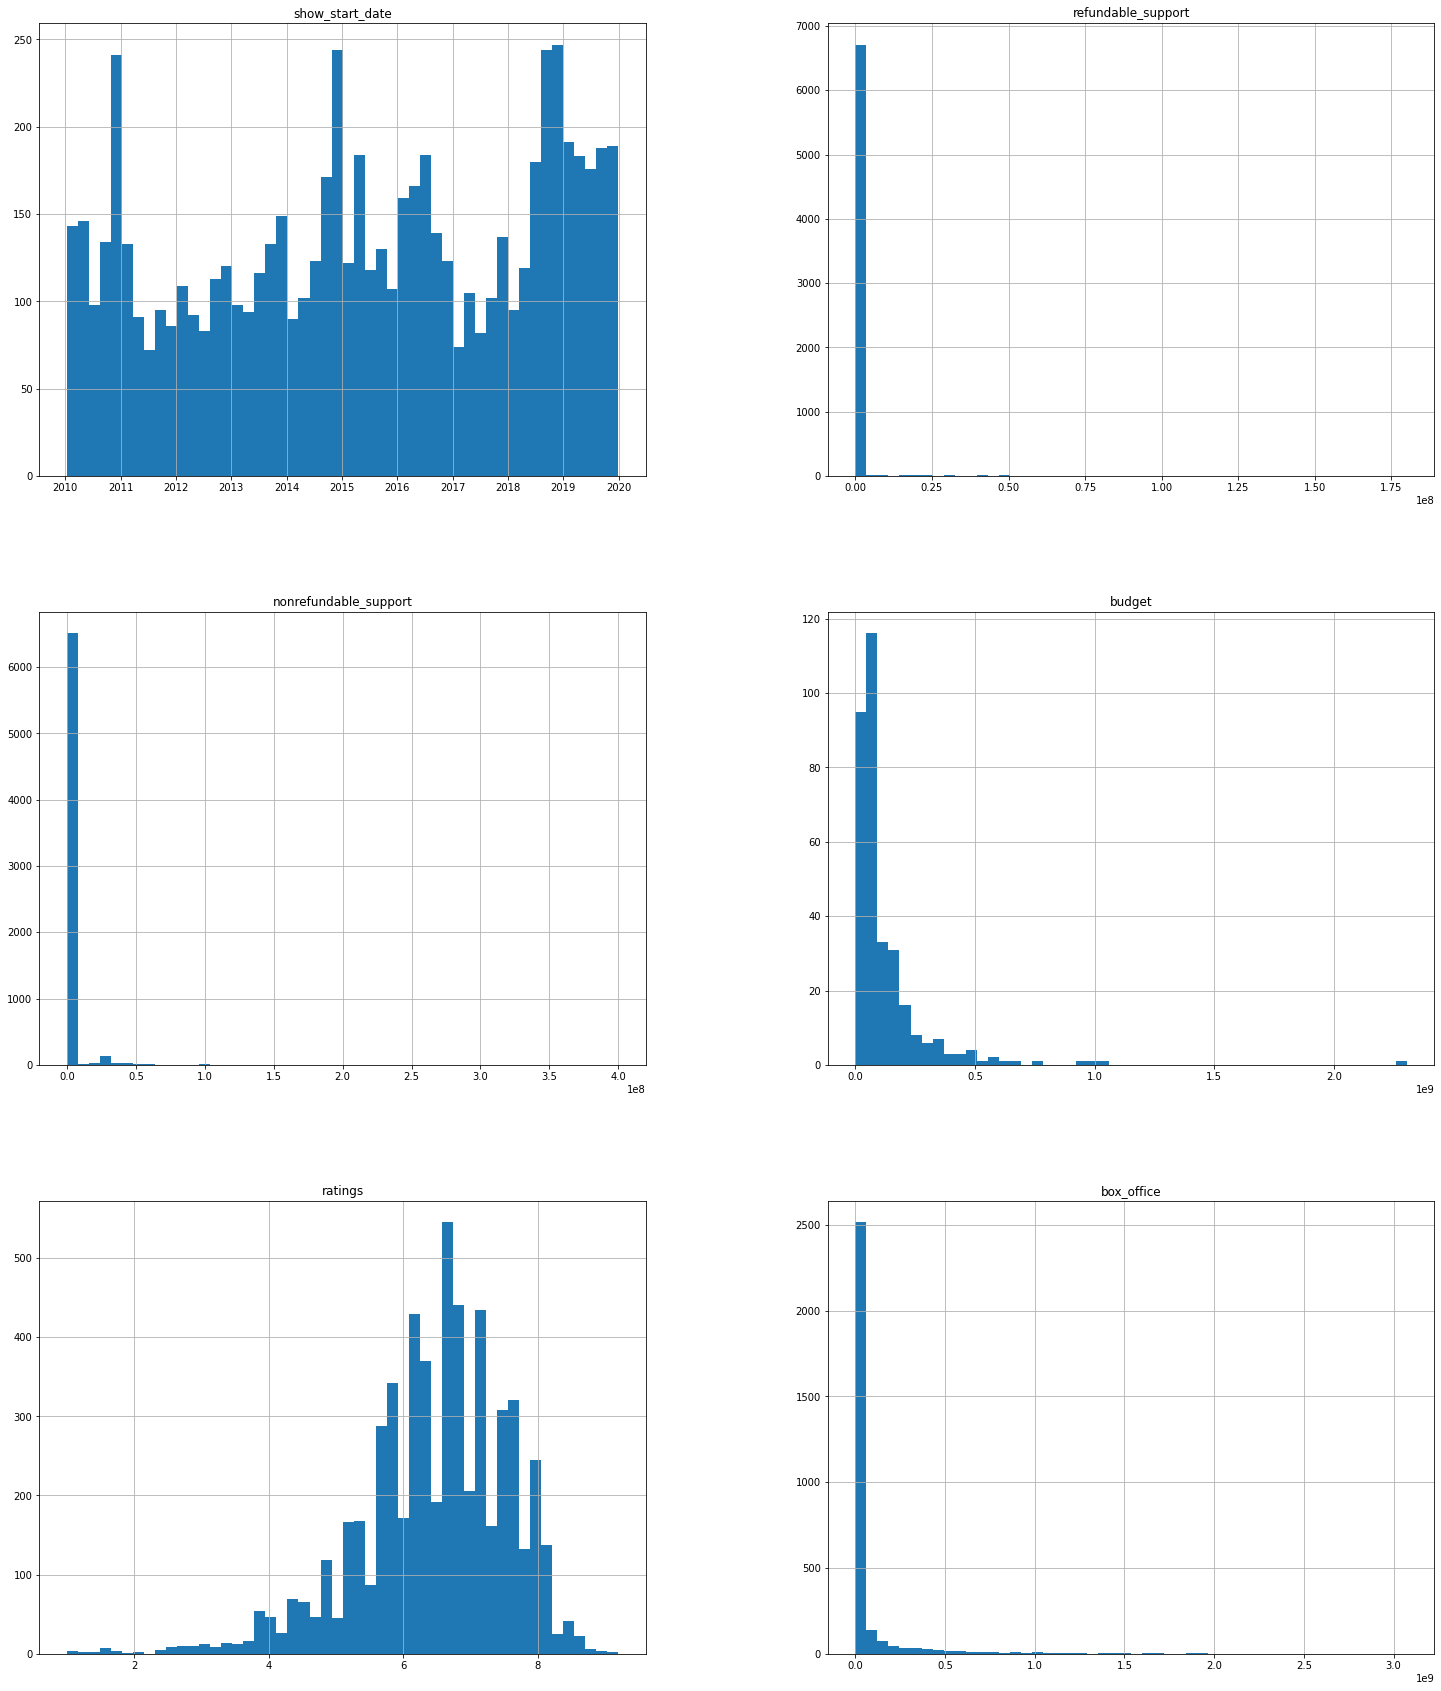

In [32]:
data.hist(bins=50, figsize=(25, 30))
plt.show()

Видим, что в толбцах `budget`, `refundable_support`, `nonrefundable_support` и `box_office` значения сбивются в один или несколько столбиков, значит там присутствуют выбросы. 

Учитывая то, что мы уже потеряли 9,5% данных, то много удалять нельзя, попробуем отсеять самые большие выбросы.

Построим гистограмму для выбросов в столбце `бюджет`.

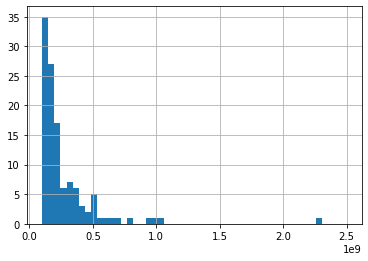

In [33]:
data['budget'].hist(bins=50, range=(100*1000000, 2500*1000000))
plt.show()

Мы видим, что значений больше 400 млн в пределах 10 штук. Удалим эти выбросы.

In [34]:
data = data[(data['budget'] < 400*1000000) | (data['budget'].isnull())]

Выведим опять все гистограммы.

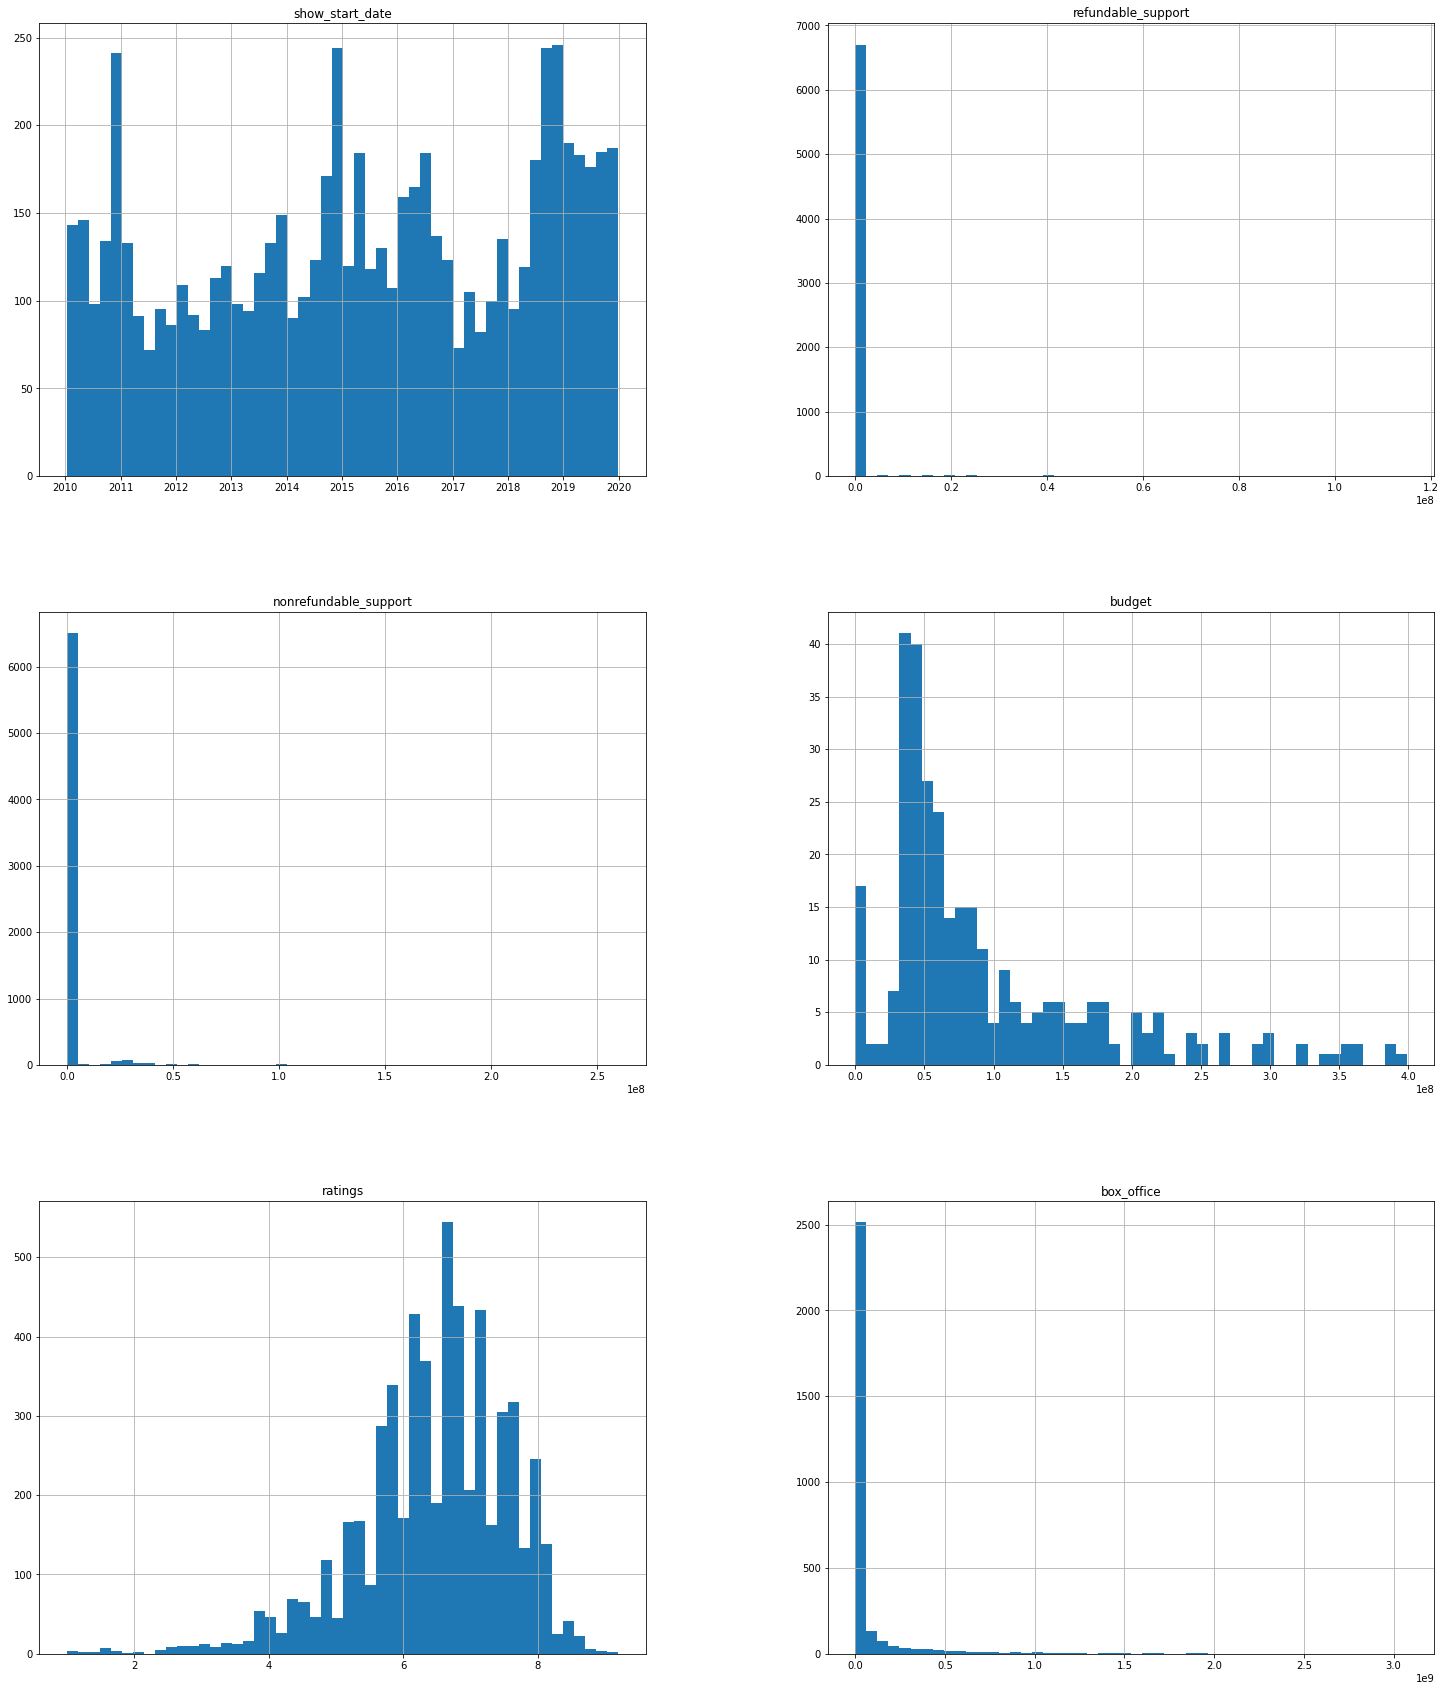

In [35]:
data.hist(bins=50, figsize=(25, 30))
plt.show()

Теперь видим, что в столбце `refundable_support` можно удалить выбросы более 50 млн.

Теперь видим, что в столбце `nonrefundable_support` можно удалить выбросы более 100 млн.



In [36]:
data = data[(data['refundable_support'] < 50*1000000) | (data['refundable_support'].isnull())]
data = data[(data['refundable_support'] < 100*1000000) | (data['refundable_support'].isnull())]



data.shape

(6784, 16)

Проверяем на то что бюджет фильма меньше чем сумма гос. поддержки.

In [37]:
data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]['pu_number'].count()

15

In [38]:
# Определяем индексы строк для удаления и удаляем их из датафрейма
indexes_to_drop = data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])].index
data = data.drop(indexes_to_drop).reset_index(drop=True)
data

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+,0.0,0.0,NaN,нет гос поддержки,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,6+,0.0,0.0,NaN,нет гос поддержки,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,0.0,0.0,NaN,нет гос поддержки,6.8,"фантастика,боевик,триллер",NaN
3,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,6+,0.0,0.0,NaN,нет гос поддержки,7.7,драма,NaN
4,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,12+,0.0,0.0,NaN,нет гос поддержки,8.3,"мелодрама,комедия",2700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6764,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,12+,0.0,0.0,NaN,нет гос поддержки,NaN,NaN,NaN
6765,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",16+,0.0,0.0,NaN,нет гос поддержки,5.4,"боевик,триллер",NaN
6766,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,0+,0.0,0.0,NaN,нет гос поддержки,NaN,NaN,NaN
6767,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,0+,0.0,0.0,NaN,нет гос поддержки,NaN,NaN,NaN


Проверяем, сколько данных осталось.

In [39]:
data.shape[0]/quantity_rows_start_data*100

90.42212129308041

## Шаг 2.6. Добавляем новые столбцы

- Создаем столбец с информацией о годе проката. Выделяем год из даты премьеры фильма.

In [40]:
data['show_start_year'] = data['show_start_date'].dt.year

In [41]:
# Обьявляем кастомную функцию и присваиваем к двум новым столбцам нулевой и первый элемент кортежа
def name_type_film(row):
    try:
        main_director = row['director'].split(",")[0]
        main_genre = row['genres'].split(",")[0]
        return main_director, main_genre
    except:
        return "NaN", "NaN"
data['main_director'] = data.apply(name_type_film, axis=1).str[0]
data['main_genre'] = data.apply(name_type_film, axis=1).str[1]

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769 entries, 0 to 6768
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  6769 non-null   object             
 1   pu_number              6769 non-null   object             
 2   show_start_date        6769 non-null   datetime64[ns, UTC]
 3   type                   6769 non-null   object             
 4   film_studio            6752 non-null   object             
 5   production_country     6767 non-null   object             
 6   director               6760 non-null   object             
 7   producer               6211 non-null   object             
 8   age_restriction        6769 non-null   object             
 9   refundable_support     6769 non-null   float64            
 10  nonrefundable_support  6769 non-null   float64            
 11  budget                 281 non-null    float64          

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

Добавляем столбец `gover_support_percent` 

In [43]:
def gover_support_percent(row):
    try:
        percent = ((row['refundable_support'] + row['nonrefundable_support']) / row['budget'])*100
        return percent
    except:
        return "NaN"
data['gover_support_percent'] = data.apply(gover_support_percent, axis=1)

**Выводы по шагу 2:**

Мы провели предобработку данных и выполнили следующие действия:

* проверили типы данных и изменили типы в стольбцах `show_start_date` на тип datetime64, ratings` на тип float, Использовав pd.to_numeric
    
* Изучити пропуски в датафрейме. Заменили пропуски на 0 в столбцах `refundable_support` и `nonrefundable_support`. Заменили пропуски на `'нет гос поддержки'` в столбцах`financing_source`.В столбцах `film_studio`, `production_country`, `director`, `producer`, `age_restriction`, `genres` и `box_office`  не возможно восстановить пропуски, поэтому их оставили.

* Проверили данные на дубликаты, удалили дубликаты в столбце `Название фильма`. Удалили 714 дубликатов, что составило 9,5 % потери данных.

* В столбцах с категориальными значениями удалили все пробелы в столбцах `type`, `director`

* Изучили и удалили выбросы.  В столбце `refundable_support` удалили выбросы более 50 млн, в столбце `nonrefundable_support` удалили выбросы более 100 млн. Общая потеря данных составила 9,58 %.

* Создали и добавили новые столбцы в таблицу: `show_start_date`, `main_director`, `main_genre` и `gover_support_percent`.


# Шаг 3. Проведение исследовательского анализ данных

- Посмотриим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируем, как эта доля менялась по годам. Сделаем вывод о том, какой период полнее всего представлен в данных.

In [44]:
# Создаем сводную таблицу по годам
film_released = data.pivot_table(index='show_start_year', values=['box_office', 'pu_number'], aggfunc='count')

# Добавляем столбец проценты
film_released['percent'] = (film_released['box_office'] /  film_released['pu_number'] * 100).round(1)
film_released

,box_office,pu_number,percent
show_start_year,,,
2010,88,762,11.5
2011,98,477,20.5
2012,116,517,22.4
2013,176,590,29.8
2014,256,729,35.1
2015,422,652,64.7
2016,491,761,64.5
2017,345,488,70.7
2018,466,876,53.2


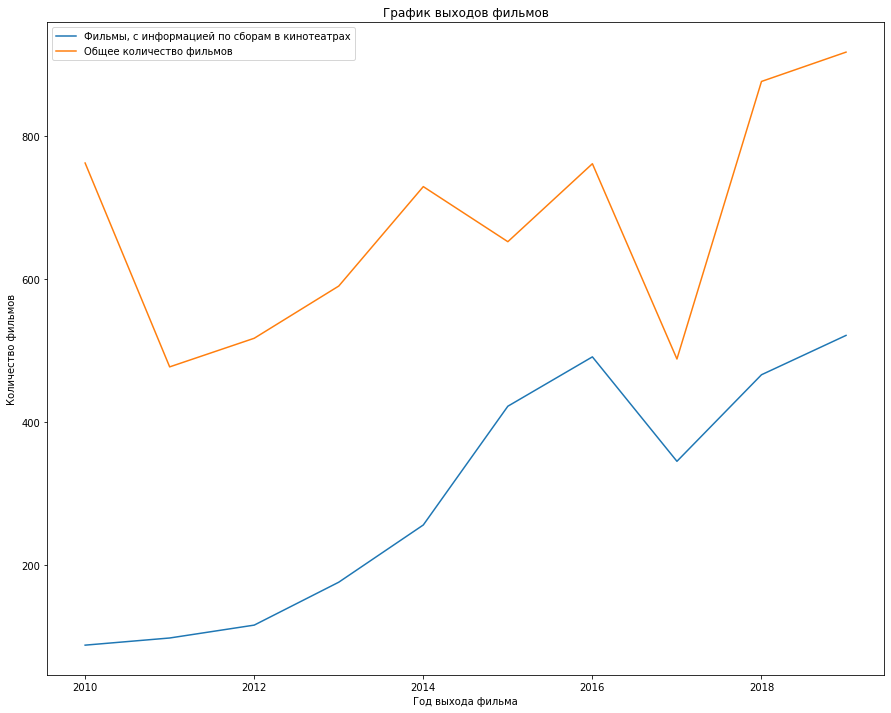

In [45]:
# назначаем года значениями оси х
x = film_released.index  

# устанавливаем оси y
y1 = film_released['box_office']  
y2 = film_released['pu_number']  

plt.figure(figsize=(15, 12))

# строим графики и нзываем линии
plt.plot(x, y1, label='Фильмы, с информацией по сборам в кинотеатрах')
plt.plot(x, y2, label='Общее количество фильмов')


plt.legend()

# Добавление подписей к осям и заголовка
plt.xlabel('Год выхода фильма')
plt.ylabel('Количество фильмов')
plt.title('График выходов фильмов')


plt.show()


На графике мы наблядаем, что количество фильмов не линейно зависимо от выхода года, и видим сильные "провалы" в 2011 и 2017 годах.
Также мы видим, что растут данные полученнным от кинотеатров, однако тоже есть провал в 2017 году.

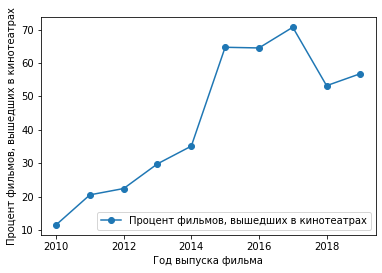

In [46]:
film_released.plot(y='percent', style='o-', label='Процент фильмов, вышедших в кинотеатрах')

plt.xlabel('Год выпуска фильма') 
plt.ylabel('Процент фильмов, вышедших в кинотеатрах')

plt.show()

На графике мы наблюдаем динамику роста процента фильма, о которых есть информация по сборам в кино. Самый лучший период, когда  полнее всего представлены данные, это 2017 год 

- Изучиаем, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [47]:
# Создаем сводную таблицу по годам
pd.options.display.float_format = '{:,.2f}'.format
film_box_office = data.pivot_table(index='show_start_year', values='box_office', aggfunc='sum')
film_box_office

,box_office
show_start_year,
2010,"2,374,340.00"
2011,"13,944,390.00"
2012,"6,465,111.00"
2013,"29,768,531.20"
2014,"7,362,364,555.50"
2015,"30,341,554,554.26"
2016,"40,273,370,312.92"
2017,"39,413,505,326.75"
2018,"45,435,753,338.24"


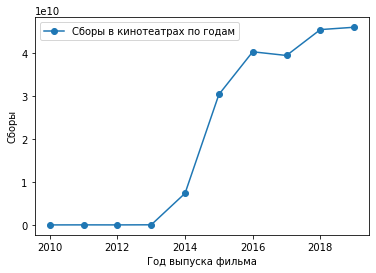

In [48]:
film_box_office.plot(y='box_office', style='o-', label='Сборы в кинотеатрах по годам')

plt.xlabel('Год выпуска фильма') 
plt.ylabel('Сборы')

plt.show()

На графике мы видим динамику роста, однако есть маленький спад в 2017 году.

* Максимальные сборы в 2019 году: 45 981 663 748

* Минимальные сборы в 2010 году: 2 374 340

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [49]:
film_box_office = data.pivot_table(index='show_start_year', values='box_office', aggfunc=['median', 'mean'])
film_box_office.columns = ['median_box_office', 'mean_box_office']
film_box_office


,median_box_office,mean_box_office
show_start_year,,
2010,"1,868.00","26,981.14"
2011,"3,042.50","142,289.69"
2012,"6,692.50","55,733.72"
2013,"3,565.00","169,139.38"
2014,"21,445.00","28,759,236.54"
2015,"4,213,741.75","71,899,418.38"
2016,"3,391,682.18","82,023,157.46"
2017,"9,288,230.00","114,242,044.43"
2018,"8,672,802.35","97,501,616.61"


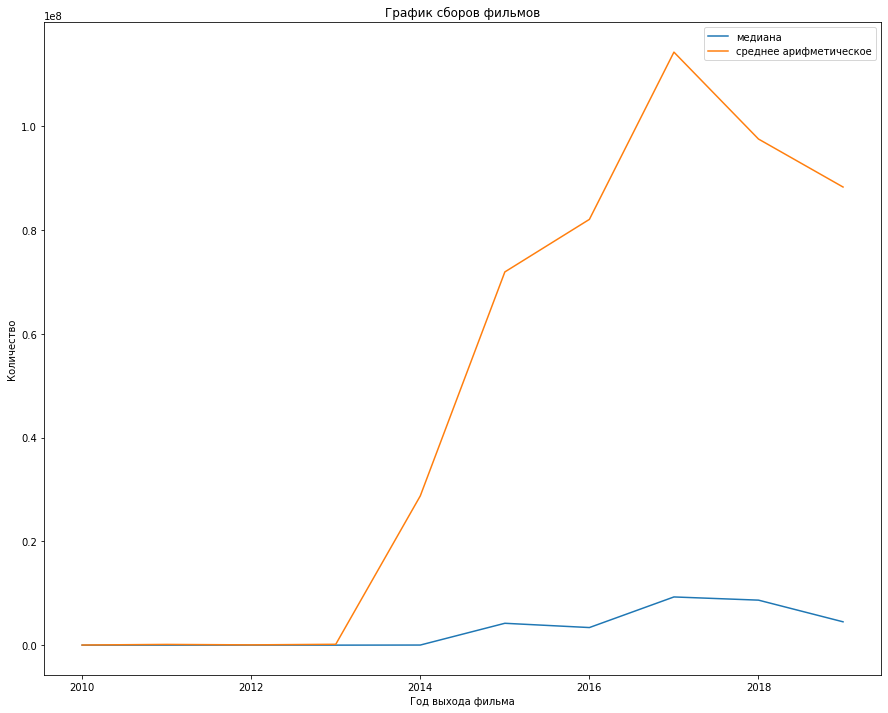

In [50]:
# назначаем года значениями оси х
x = film_box_office.index  

# устанавливаем оси y
y1 = film_box_office['median_box_office']  
y2 = film_box_office['mean_box_office']  

plt.figure(figsize=(15, 12))

# строим графики и нзываем линии
plt.plot(x, y1, label='медиана')
plt.plot(x, y2, label='среднее арифметическое')


plt.legend()

# Добавление подписей к осям и заголовка
plt.xlabel('Год выхода фильма')
plt.ylabel('Количество')
plt.title('График сборов фильмов')


plt.show()

Среднее арифметическое резко начинает расти в 2013 году по отношению к медиане. Можно предположить, что на это влияют выход больших кассовых блокбастеров.

In [51]:
data_filtred = data[data['show_start_year'] > 2014]
data_filtred = data_filtred.pivot_table(index='show_start_year', columns='age_restriction', values='box_office', aggfunc='mean')
data_filtred

age_restriction,0+,12+,16+,18+,6+
show_start_year,,,,,
2015,"7,593,549.11","161,574,865.27","49,598,276.90","27,670,784.39","171,067,142.16"
2016,"3,754,588.72","143,089,459.93","84,392,517.72","34,181,027.84","160,899,564.27"
2017,"76,532,976.67","118,257,153.07","152,796,768.09","65,656,432.52","177,308,447.55"
2018,"6,489,800.42","181,750,570.55","105,182,572.04","48,939,025.15","136,283,307.82"
2019,"5,915,355.61","142,410,661.76","71,457,920.10","55,310,362.31","149,664,339.10"


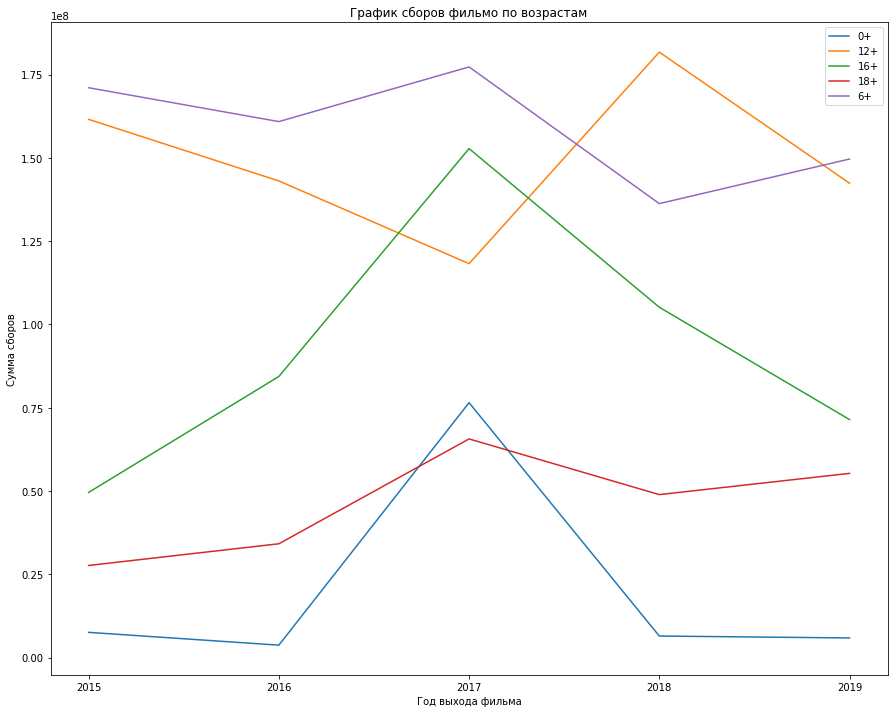

In [52]:
# назначаем года значениями оси х
x = data_filtred.index  

# устанавливаем оси y
y1 = data_filtred['0+']  
y2 = data_filtred['12+']  
y3 = data_filtred['16+']  
y4 = data_filtred['18+']  
y5 = data_filtred['6+']  

plt.figure(figsize=(15, 12))

# строим графики и называем линии
plt.plot(x, y1, label='0+')
plt.plot(x, y2, label='12+')
plt.plot(x, y3, label='16+')
plt.plot(x, y4, label='18+')
plt.plot(x, y5, label='6+')

plt.legend()

plt.xticks([2015, 2016, 2017, 2018, 2019])

# Добавление подписей к осям и заголовка
plt.xlabel('Год выхода фильма')
plt.ylabel('Сумма сборов')
plt.title('График сборов фильмо по возрастам')


plt.show()

На графике видим, что больше всего денег в прокате собирают фильмы с категорией 12+ и 6+, а меньше всего с категорией 0+. 

Также наблюдаем нелинейную зависимость от категории ограничения по возрасту и годом выхода фильма в прокат. Динамика у фильмов разных возрастных групп разная. 


**Выводы по шагу 3:**

Провели исследовательский анализ данных: 

1. Проанализировали количество выходов фильмов по годам и изучили данные о прокате фильмов в кинотеатре:
* В целом произошло увеличение количества выпускаемых фильмов с 762х фильмов в 2010 году до 917 в 2019 году, однако наблюдаются резские спады выпускаемых фильмов в 2011 году до 477 фильмов и 2017 году до 480 фильмов.
* Также выявили динамику роста фильмов, про которые есть информация от кинотетров. Наибольший процент был в 2071 году (70,7%). Однако в этой характеристике есть тоже провал в 2019 году.
2.  Изучили, как менялась динамика проката по годам:
* Мы наблюдаем динамику роста, однако есть небольшой спад в 2017 году. Максимальные сборы в 2019 году: 45 981663 748   Минимальные сборы в 2010 году: 2 374 340.
3. Посчитали и изучили значения среднего арифметического и медианы сборов фильмов за каждый год:
* Среднее арифметическое резко начинает расти в 2013 году по отношению к медиане. Предполагаем, что средние арифметические значения "вытягивают" большие кассовые блокбастеры.
4. Проанализировали, влияют ли возрастные ограничения на кассовые сборы фильмов:
* Возрастные ограничения влияют на кассовые сборы, так самыми успешными фильмами в финансовом плане являются фильмы с категорией 6+ 12+, а меньше всего в прокате собирают фильмы с категорией 0+.
* Зависимость сборов фильмов по годам от категорий разные. Так у категорий 16+ и 12+ разнонапрвелнные тенденции, а фильмы с категорией 0+ имели резкий подъем в 2017 году, а потом вернулись к уровню 2016 года.





# Шаг 4. Исследуем фильмы, которые получили государственную поддержку


Проверим сколько выделяются средств на поддержку кино в разрезе источника финансирования и годах.
* Создадим новый датафрейм, где будут только фильмы с господдержкой
* Создадим сводную таблицу по источникам финансирования и годам
* Построим график

In [53]:
gover_fundable_data = data[data['financing_source'] != 'нет гос поддержки'].reset_index(drop=True)

gover_fundable_data['gover_sum_support'] = (
   gover_fundable_data['refundable_support'] + 
    gover_fundable_data['nonrefundable_support']
)


In [54]:
gov_fundable_data_pivot = (
    gover_fundable_data.pivot_table(index='show_start_year', 
                                  columns='financing_source', 
                                  values='gover_sum_support', aggfunc='sum')
)
gov_fundable_data_pivot

financing_source,Министерство культуры,"Министерство культуры, Фонд кино",Фонд кино
show_start_year,,,
2013,"26,500,000.00",NaN,"107,847,945.00"
2014,"211,500,000.00","136,502,299.00","201,000,000.00"
2015,"1,100,810,000.00","262,803,119.00","1,597,049,285.00"
2016,"743,851,000.00","329,200,000.00","1,192,000,000.00"
2017,"351,000,000.00","64,346,881.00","658,624,781.00"
2018,"926,000,000.00","55,000,000.00","1,547,000,000.00"
2019,"1,411,000,000.00","118,000,000.00","1,095,000,000.00"


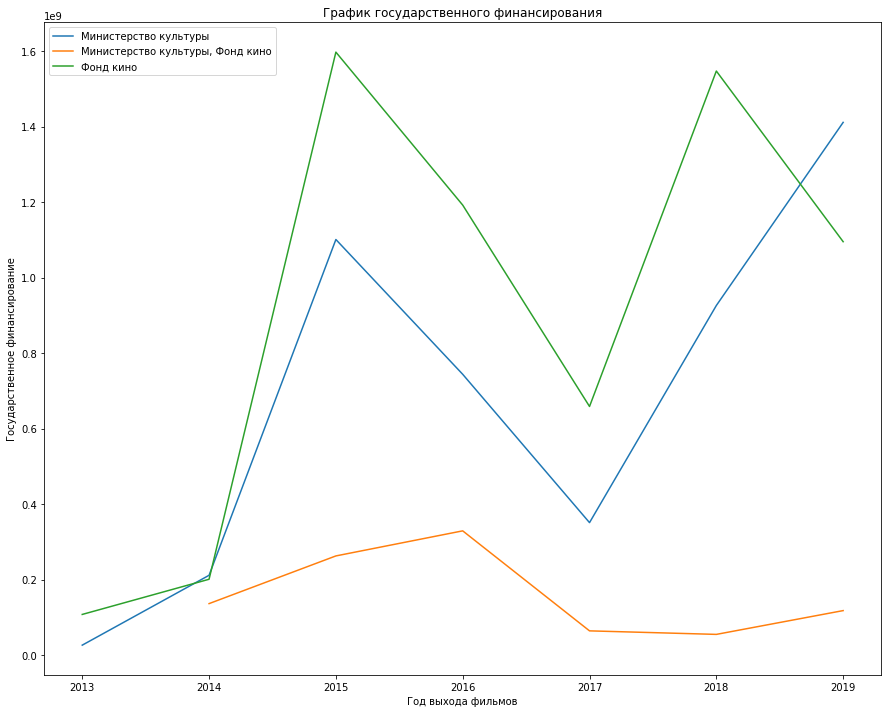

In [55]:
# назначаем года значениями оси х
x = gov_fundable_data_pivot.index  

# устанавливаем оси y
y1 = gov_fundable_data_pivot['Министерство культуры']  
y2 = gov_fundable_data_pivot['Министерство культуры, Фонд кино']  
y3 = gov_fundable_data_pivot['Фонд кино']  
  

plt.figure(figsize=(15, 12))

# строим графики и называем линии
plt.plot(x, y1, label='Министерство культуры')
plt.plot(x, y2, label='Министерство культуры, Фонд кино')
plt.plot(x, y3, label='Фонд кино')


plt.legend()

# Добавление подписей к осям и заголовка
plt.xlabel('Год выхода фильмов')
plt.ylabel('Государственное финансирование')
plt.title('График государственного финансирования')


plt.show()

На графике мы наблюдаем, что финансирование кино не стабильно. Максимальную сумму выделил Фонд кино на фильмы 2015 года выхода (1,866,049,000р). 

Проверим, хорошо ли окупаются фильмы с  объёмом возвратных средств государственной поддержки:
* Создадим датайфрейм в котором будут только фильмы с объёмом возвратных средств государственной поддержки
* Добавим столбец `процент окупаемости`
* В киноиндустрии успешным фильмом считается фильм, у которого процент окупаемости больше 300%, посчитаем процент таких фильмов в датафрейме

In [56]:
gover_refundable_data = gover_fundable_data[gover_fundable_data['refundable_support'] > 0].reset_index(drop=True)

In [57]:
gover_refundable_data['payback_percent'] = (
    ((gover_refundable_data['box_office'] / gover_refundable_data['refundable_support'])*100).round()
)

In [58]:
(
    ((gover_refundable_data[gover_refundable_data['payback_percent'] > 300]['pu_number'].count() / 
     gover_refundable_data['pu_number'].count())*100).round(1)
)

43.8

Процент фильмов с хорошей окупаемостью менее 43,8%. Это даже меньше половины, это не позитивный результат. 

Проверим рейтинги у фильмов с господдержкой:
* Найдем среднее арифметическое рейтинга фильмов с господдержкой
* По личному опыту, могу преположить, что хорошим фильм имеет рейтинг от 7,0, посчитаем процент фильмов с рейтингом от 7.

In [59]:
(gover_fundable_data['ratings'].mean()).round(1)

6.0

Сравним с общим средним значением рейтинка

In [60]:
(data['ratings'].mean()).round(1)

6.5

Меньше чем в среднем у всех фильмов.

In [61]:
(
    (gover_fundable_data[gover_fundable_data['ratings'] >= 7]['pu_number'].count() / 
    gover_fundable_data['pu_number'].count()*100).round(1)
)

15.3

15,3% фильмов с господдержкой имеет рейтинг от 7 и выше. Можно предположить, что такие фильмы не пользуются популярностью у зрителя.


Посмотрим зависимость вложенных государственных денег на рейтинг фильма, для этого построим диаграмму рассеяния.

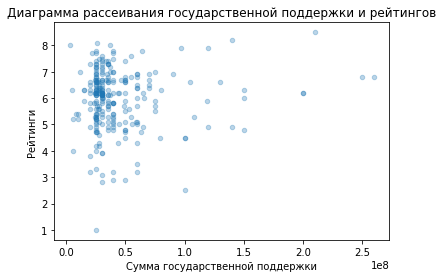

In [62]:
gover_fundable_data.plot(x='gover_sum_support', y='ratings', kind='scatter', alpha=0.3)


plt.xlabel('Сумма государственной поддержки')
plt.ylabel('Рейтинги')
plt.title('Диаграмма рассеивания государственной поддержки и рейтингов')

plt.show()

По диаграмме понимаем, что рейтинг фильма практически не зависит от вложенных в него государственных инвестиций. 

Проверим, есть ли режиссёры, которые снимали фильмы с государственной поддержкой несколько раз.

In [63]:
gover_fundable_data['main_director'].value_counts().head(10)

NaN              15
Р.Давлетьяров     4
А.Аксененко       3
А.Котт            3
С.Андреасян       3
С.Мокрицкий       3
Д.Дьяченко        3
М.Расходников     2
К.Шипенко         2
А.Матисон         2
Name: main_director, dtype: int64

Сделаем список режиссеров снимавших более трех раз фильмы с государственной поддержкой и отфильтурем по нему датафрейм.

In [64]:
list_main_director = ['Р.Давлетьяров', 'С.Мокрицкий', 'А.Котт', 'С.Андреасян', 'Д.Дьяченко', 'А.Аксененко']
top_main_director_data = gover_fundable_data.query('main_director in @list_main_director')

Посмотрим средние рейтинги фильмов, которые сняли эти режиссеры.

In [65]:
top_main_director_data.groupby('main_director')['ratings'].mean().round(1)

main_director
А.Аксененко     5.30
А.Котт          5.80
Д.Дьяченко      5.30
Р.Давлетьяров   6.40
С.Андреасян     7.00
С.Мокрицкий     6.60
Name: ratings, dtype: float64

Почти у всех режиссеров средний рейтинг фильмов ниже 7,0. Что говорит нам о том, что они снимают не востребованные у зрителей фильмы.

**Выводы по шагу 4:**
1. Проанализировали как выдялются денежные средства на фильмы по годам:
* Выявили, что динамика финансирования кино не стабильная, самые большие дотации были выделены Фондом кино в 2015 (1,597,049,285.00р). 
2. Проверили окупаемость фильмов с государственной поддержкой:
* Посчитали процент фильмов с окупаемостью высше 300% и это 43,8%. Чуть меньше половины фильмов собъёмом возвратных средств государственной поддержки проходят порок окупаемости в 300%;
4. Сравнили рейтинги фильмов со всеми фильмами, результаты 6,0 и 6,5 соответственно. Фидьмы с гос поддерджкой уступают. 
5. Проверили зависимость вложенных государственных денег на рейтинг фильма, для этого построим диаграмму рассеяния:
* Выявли, что рейтинг фильма практически не зависит от суммых вложенных в него государственных денег.
6. Проверили, есть ли режиссеры, которые снимали фильмы несколько раз с государственной поддержкой:
* Составили спискос из 6 режиссеров, снимавших фильмы с госсударственной поддержкой более 2х раз. Только у одного из 6 режиссеров средний рейтиенг равен 7,0, остальные ниже 7,0. 

# Шаг 5. Общий вывод

Мы получили две таблицы с фильмами:  

с прокатными удостоверениями и сведения о сборах в российских кинотеарах.
"Склеили" 2 таблицы и изучили их.

Мы провели предобработку данных и выполнили следующие действия:

* проверили типы данных и изменили типы в стольбцах `show_start_date` на тип datetime64, ratings` на тип float, Использовав pd.to_numeric
    
* Изучити пропуски в датафрейме. Заменили пропуски на 0 в столбцах `refundable_support` и `nonrefundable_support`. Заменили пропуски на `'нет гос поддержки'` в столбцах`financing_source`.В столбцах `director`, `producer`, `age_restriction`, `genres` и `box_office` не возможно восстановить пропуски, поэтому их оставили.

* Проверили данные на дубликаты, удалили дубликаты в столбцах `Название фильма`, `Режиссер` и `Продюсер`. Удалили 666 дубликатов, что составило 8,9 % потери данных.

* В столбцах с категориальными значениями удалили все пробелы в столбцах `type`, `director`

* Изучили и удалили выбросы.  В столбце `refundable_support` удалили выбросы более 50 млн, в столбце `nonrefundable_support` удалили выбросы более 100 млн Общая потеря данных составила 10,6 %.

* Создали и добавили новые столбцы в таблицу: `show_start_date`, `main_director`, `main_genre` и `gover_support_percent`.

Провели исследовательский анализ данных: 

1. Проанализировали количество выходов фильмов по годам и изучили данные о прокате фильмов в кинотеатре:
* В целом произошло увеличение количсетва выпускаемых фильмов с 762х фильмов в 2010 году до 868 в 2019 году, однако наблюдаются резские спады выпускаемых фильмов в 2011 году до 477 фильмов и 2017 году до 480 фильмов.
* Также выявили динамику роста фильмов, про которые есть информация от кинотетров. Наибольший процент был в 2019 году (70,7%). Однако в этой характеристике есть тоже провал в 2017 году.
2.  Изучили, как менялась динамика проката по годам:
* Мы наблюдаем динамику роста, однако есть спад в 2019 году. Максимальные сборы в 2019 году: 45 981663 748 , * Минимальные сборы в 2010 году: 2 374 340.
3. Посчитали и изучили значения среднего арифметического и медианы сборов фильмов за каждый год:
* Среднее арифметическое резко начинает расти в 2013 году по отношению к медиане. Предполагаем, что средние арифметические значения "вытягивают" большие кассовые блокбастеры.
4. Проанализировали, влияют ли возрастные ограничения на кассовые сборы фильмов:
* Возрастные ограничения влияют на кассовые сборы, так самыми успешными фильмами в финансовом плане являются фильмы с категорией 16+, а меньше всего в прокате собирают фильмы с категорией 0+.
* Зависимость сборов фильмов по годам от категорий разные. Так у категорий 16+ и 12+ разнонапрвелнные тенденции, а фильмы с категорией 0+ имели резкий подъем в 2017 году, а потом вернулись к уровню 2016 года.


Зависимость сборов фильмов по годам от категорий разные. Так у категорий 16+ и 12+ разнонапрвелнные тенденции, а фильмы с категорией 0+ имели резкий подъем в 2017 году, а потом вернулись к уровню 2016 года.

Исследовали фильмы, которые получили государственную поддержку:
1. Проанализировали как выдялются денежные средства на фильмы по годам:
* Выявили, что динамика финансирования кино не стабильная, самые большие дотации были выделены Фондом кино в 2015 (1,866,049,000р). 
2. Проверили окупаемость фильмов с государственной поддержкой:
* Посчитали процент фильмов с окупаемостью высше 300% и это 43,8%%. Чуть меньше половины фильмов собъёмом возвратных средств государственной поддержки проходят порок окупаемости в 300%;
3. Проверили зависимость вложенных государственных денег на рейтинг фильма, для этого построим диаграмму рассеяния:
* Выявли, что рейтинг фильма практически не зависит от суммых вложенных в него государственных денег.
4. Проверили, есть ли режиссеры, которые снимали фильмы несколько раз с государственной поддержкой:
* Составили список из 6 режиссеров, снимавших фильмы с госсударственной поддержкой более 2х раз. Только у одного из 6 режиссеров средний рейтиенг равен 7,0, остальные ниже 7,0. 
5. Сравнили средний рейтинг с общим рейтингом всех фильмом 6,0 и 6,5 соответсвено. 

***Общий вывод:***
Фильмы с государственной поддержкой не пользуются спросом у зрителя, у таких фильмов достаточно посредственная окупаемость, 44,9%, Режиссеры снимавшие фильмы более двух раз, также не выдают достойных результатов. Налицо не эффектиное рассходование госсударственных денег. 

